## Import các thư viện cần thiết

In [1]:
import matplotlib.pyplot as plt
from rouge import Rouge
import seaborn as sns
import pandas as pd
import numpy as np

## Tải các tập evaluation đã được trả lời

In [2]:
vinallama_df = pd.read_csv("./eval_vinallama-7b.csv")
vistral_df = pd.read_csv("./eval_vistral-7b.csv")

y = list(range(1,140))

### Mô hình Vinallama:7b

In [3]:
vinallama_df.head(10)

,question,answer,contexts,ground_truth
0,Gói FlavorLock™ là gì?,Gói FlavorLock™ là một gói kín khí được sử dụn...,['Gói FlavorLock™ là gì?\nCông nghệ FlavorLock...,Công nghệ FlavorLock™ độc đáo của chúng tôi sử...
1,Tôi nên sử dụng loại cà phê xay nào?,Bắt đầu với cà phê nguyên hạt và xay mới cho m...,['Tôi nên sử dụng loại cà phê xay nào?\nĐể có ...,Để có được loại cà phê có hương vị thơm ngon n...
2,Cách bảo quản cà phê tốt nhất là gì?,"Mua cà phê hàng tuần, bảo quản trong thùng chứ...",['Câu hỏi thường gặp về Chuẩn bị Cà phê\nCách ...,"Khi được rang, cà phê bắt đầu mất mùi khi tiếp..."
3,Cà phê sẽ tươi trong bao lâu?,Cà phê đựng trong túi FlavorLock™ chưa mở sẽ t...,['Câu hỏi thường gặp về Chuẩn bị Cà phê\nCách ...,Cà phê đựng trong túi FlavorLock™ chưa mở sẽ t...
4,Thẻ Starbucks là gì?,Thẻ Starbucks là một thẻ nhựa vật lý mang thươ...,['Thẻ Starbucks là một thẻ nhựa vật lý mang th...,Thẻ Starbucks là một thẻ vật lý mang thương hi...
5,Tôi có thể nhận Thẻ Starbucks ở đâu?,Thẻ Starbucks có sẵn tại tất cả cửa hàng Starb...,['Câu hỏi thường gặp chương trình Starbucks Re...,Thẻ Starbucks có sẵn tại tất cả cửa hàng Starb...
6,Làm thế nào để tôi kích hoạt Thẻ Starbucks?,Thẻ Starbucks phải được kích hoạt với giá trị ...,['Câu hỏi thường gặp chương trình Starbucks Re...,Thẻ Starbucks phải được kích hoạt với giá trị ...
7,Tôi có thể sử dụng Thẻ Starbucks của mình ở đâu?,Thẻ Starbucks được chấp nhận tại tất cả cửa hà...,['Thẻ Starbucks có sẵn tại tất cả cửa hàng Sta...,Thẻ Starbucks được chấp nhận tại tất cả cửa hà...
8,Tôi có thể sử dụng Thẻ Starbucks của mình khi ...,Thẻ Starbucks được kích hoạt tại Việt Nam chỉ ...,['Thẻ Starbucks có sẵn tại tất cả cửa hàng Sta...,Thẻ Starbucks được kích hoạt tại Việt Nam chỉ ...
9,Làm thế nào để tôi đăng ký Thẻ Starbucks?,Bạn có thể đăng ký Thẻ Starbucks một cách dễ d...,['Làm thế nào để tôi đăng ký Thẻ Starbucks?\nB...,Bạn có thể đăng ký Thẻ Starbucks một cách dễ d...


### Mô hình Vistral:7b

In [4]:
vistral_df.head(10)

,question,answer,contexts,ground_truth
0,Gói FlavorLock™ là gì?,Gói FlavorLock™ là một công nghệ độc đáo được ...,['Gói FlavorLock™ là gì?\nCông nghệ FlavorLock...,Công nghệ FlavorLock™ độc đáo của chúng tôi sử...
1,Tôi nên sử dụng loại cà phê xay nào?,Để có được hương vị thơm ngon nhất từ hạt cà p...,['Tôi nên sử dụng loại cà phê xay nào?\nĐể có ...,Để có được loại cà phê có hương vị thơm ngon n...
2,Cách bảo quản cà phê tốt nhất là gì?,Cách bảo quản cà phê tốt nhất là mua hàng tuần...,['Câu hỏi thường gặp về Chuẩn bị Cà phê\nCách ...,"Khi được rang, cà phê bắt đầu mất mùi khi tiếp..."
3,Cà phê sẽ tươi trong bao lâu?,Cà phê đựng trong túi FlavorLock™ chưa mở có t...,['Câu hỏi thường gặp về Chuẩn bị Cà phê\nCách ...,Cà phê đựng trong túi FlavorLock™ chưa mở sẽ t...
4,Thẻ Starbucks là gì?,Thẻ Starbucks là một thẻ nhựa vật lý mang thươ...,['Thẻ Starbucks là một thẻ nhựa vật lý mang th...,Thẻ Starbucks là một thẻ vật lý mang thương hi...
5,Tôi có thể nhận Thẻ Starbucks ở đâu?,Thẻ Starbucks có sẵn tại tất cả cửa hàng Starb...,['Câu hỏi thường gặp chương trình Starbucks Re...,Thẻ Starbucks có sẵn tại tất cả cửa hàng Starb...
6,Làm thế nào để tôi kích hoạt Thẻ Starbucks?,Thẻ Starbucks phải được kích hoạt với giá trị ...,['Câu hỏi thường gặp chương trình Starbucks Re...,Thẻ Starbucks phải được kích hoạt với giá trị ...
7,Tôi có thể sử dụng Thẻ Starbucks của mình ở đâu?,Thẻ Starbucks được chấp nhận tại tất cả cửa hà...,['Thẻ Starbucks có sẵn tại tất cả cửa hàng Sta...,Thẻ Starbucks được chấp nhận tại tất cả cửa hà...
8,Tôi có thể sử dụng Thẻ Starbucks của mình khi ...,Thẻ Starbucks được kích hoạt tại Việt Nam chỉ ...,['Thẻ Starbucks có sẵn tại tất cả cửa hàng Sta...,Thẻ Starbucks được kích hoạt tại Việt Nam chỉ ...
9,Làm thế nào để tôi đăng ký Thẻ Starbucks?,Bạn có thể đăng ký Thẻ Starbucks một cách dễ d...,['Làm thế nào để tôi đăng ký Thẻ Starbucks?\nB...,Bạn có thể đăng ký Thẻ Starbucks một cách dễ d...


## Sử dụng ROUGE để tính [ Precision , Recall , F1 Score ] của mô hình Vistral:7b

In [5]:
vistral_hypothesis = vistral_df["answer"].values.tolist()
vistral_reference = vistral_df["ground_truth"].values.tolist()

vistral_rouge = Rouge()
vistral_scores = vistral_rouge.get_scores(vistral_hypothesis, vistral_reference)
avg_vistral_scores = vistral_rouge.get_scores(vistral_hypothesis, vistral_reference, avg=True)
print("Vistral:7b's average ROUGE Score: ", np.array(avg_vistral_scores))

Vistral:7b's average ROUGE Score:  {'rouge-1': {'r': 0.8510748959539588, 'p': 0.8002774006347226, 'f': 0.8044940072711066}, 'rouge-2': {'r': 0.7728599914338429, 'p': 0.7335367648609089, 'f': 0.7323029335954093}, 'rouge-l': {'r': 0.8380219548252232, 'p': 0.7892241083708161, 'f': 0.7933672475195972}}


In [6]:
rouge_1_vistral = []
rouge_2_vistral = []
rouge_l_vistral = []

for sample in vistral_scores:
    rouge_1_vistral.append(sample['rouge-1'])  
    rouge_2_vistral.append(sample['rouge-2'])  
    rouge_l_vistral.append(sample['rouge-l'])

rouge_1_vistral_df = pd.DataFrame(rouge_1_vistral)
rouge_2_vistral_df = pd.DataFrame(rouge_2_vistral)
rouge_l_vistral_df = pd.DataFrame(rouge_l_vistral)

C:\Users\xuanv\AppData\Local\Temp\ipykernel_13108\2941712211.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


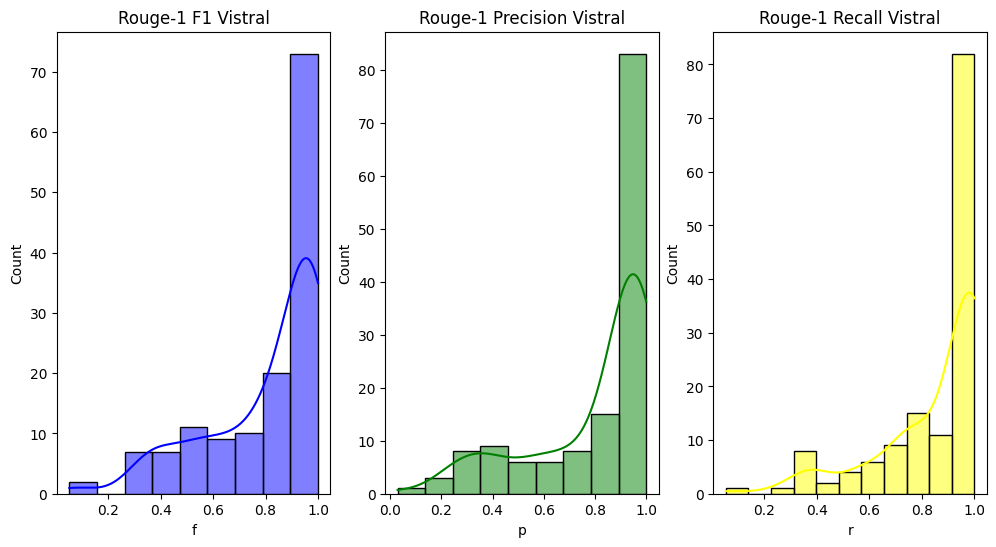

<Figure size 640x480 with 0 Axes>

In [20]:
fig, ax = plt.subplots(1,3, figsize=(12,6))
plt.figure()
sns.histplot(rouge_1_vistral_df['f'], ax=ax[0], color="blue", kde=True)
sns.histplot(rouge_1_vistral_df['p'], ax=ax[1], color="green", kde=True)
sns.histplot(rouge_1_vistral_df['r'], ax=ax[2], color="yellow", kde=True)
ax[0].set_title("Rouge-1 F1 Vistral")
ax[1].set_title("Rouge-1 Precision Vistral")
ax[2].set_title("Rouge-1 Recall Vistral")
fig.show()

C:\Users\xuanv\AppData\Local\Temp\ipykernel_13108\763951786.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


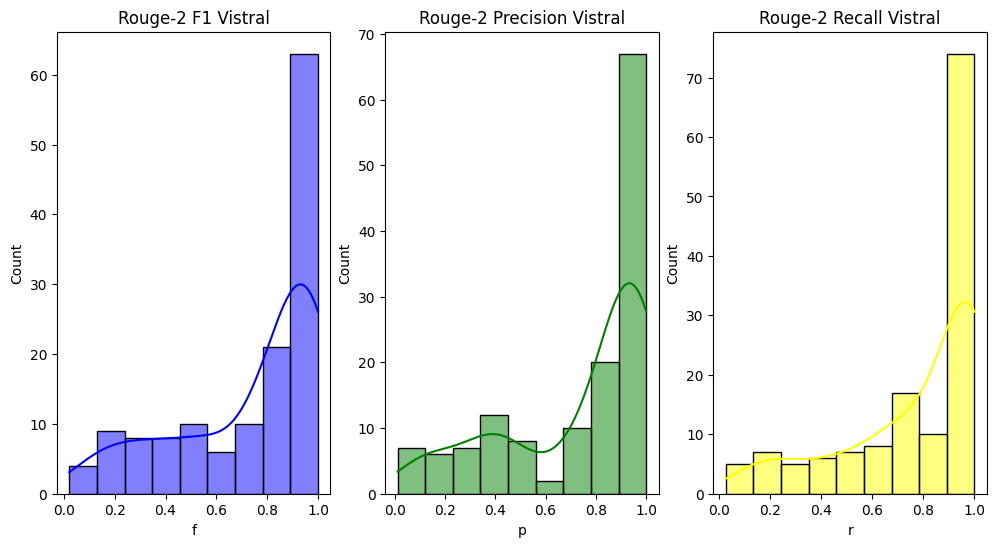

<Figure size 640x480 with 0 Axes>

In [21]:
fig, ax = plt.subplots(1,3, figsize=(12,6))
plt.figure()
sns.histplot(rouge_2_vistral_df['f'], ax=ax[0], color="blue", kde=True)
sns.histplot(rouge_2_vistral_df['p'], ax=ax[1], color="green", kde=True)
sns.histplot(rouge_2_vistral_df['r'], ax=ax[2], color="yellow", kde=True)
ax[0].set_title("Rouge-2 F1 Vistral")
ax[1].set_title("Rouge-2 Precision Vistral")
ax[2].set_title("Rouge-2 Recall Vistral")
fig.show()

C:\Users\xuanv\AppData\Local\Temp\ipykernel_13108\1335418178.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


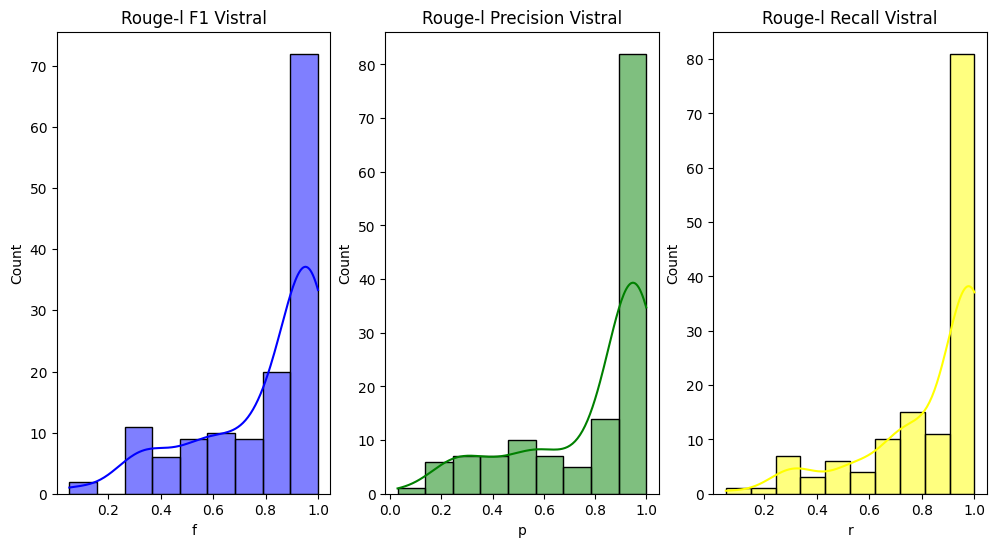

<Figure size 640x480 with 0 Axes>

In [22]:
fig, ax = plt.subplots(1,3, figsize=(12,6))
plt.figure()
sns.histplot(rouge_l_vistral_df['f'], ax=ax[0], color="blue", kde=True)
sns.histplot(rouge_l_vistral_df['p'], ax=ax[1], color="green", kde=True)
sns.histplot(rouge_l_vistral_df['r'], ax=ax[2], color="yellow", kde=True)
ax[0].set_title("Rouge-l F1 Vistral")
ax[1].set_title("Rouge-l Precision Vistral")
ax[2].set_title("Rouge-l Recall Vistral")
fig.show()

## Sử dụng ROUGE để tính [ Precision , Recall , F1 Score ] của mô hình Vinallama:7b

In [10]:
vina_hypothesis = vinallama_df["answer"].values.tolist()
vina_reference = vinallama_df["ground_truth"].values.tolist()

vina_rouge = Rouge()
vina_scores = vina_rouge.get_scores(vina_hypothesis, vina_reference)
avg_vina_scores = vina_rouge.get_scores(vina_hypothesis, vina_reference, avg=True)
print("Vinallama:7b's average ROUGE Score:", avg_vina_scores)

Vinallama:7b's average ROUGE Score: {'rouge-1': {'r': 0.6980207157470024, 'p': 0.8737606389789212, 'f': 0.7502839118452062}, 'rouge-2': {'r': 0.6230145433901477, 'p': 0.7843345177558197, 'f': 0.6715483878119216}, 'rouge-l': {'r': 0.679542747373766, 'p': 0.8492453852190726, 'f': 0.7302541001401321}}


In [11]:
rouge_1_vina = []
rouge_2_vina = []
rouge_l_vina = []

for sample in vina_scores:
    rouge_1_vina.append(sample['rouge-1'])  
    rouge_2_vina.append(sample['rouge-2'])  
    rouge_l_vina.append(sample['rouge-l'])

rouge_1_vina_df = pd.DataFrame(rouge_1_vina)
rouge_2_vina_df = pd.DataFrame(rouge_2_vina)
rouge_l_vina_df = pd.DataFrame(rouge_l_vina)

C:\Users\xuanv\AppData\Local\Temp\ipykernel_13108\4159541918.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


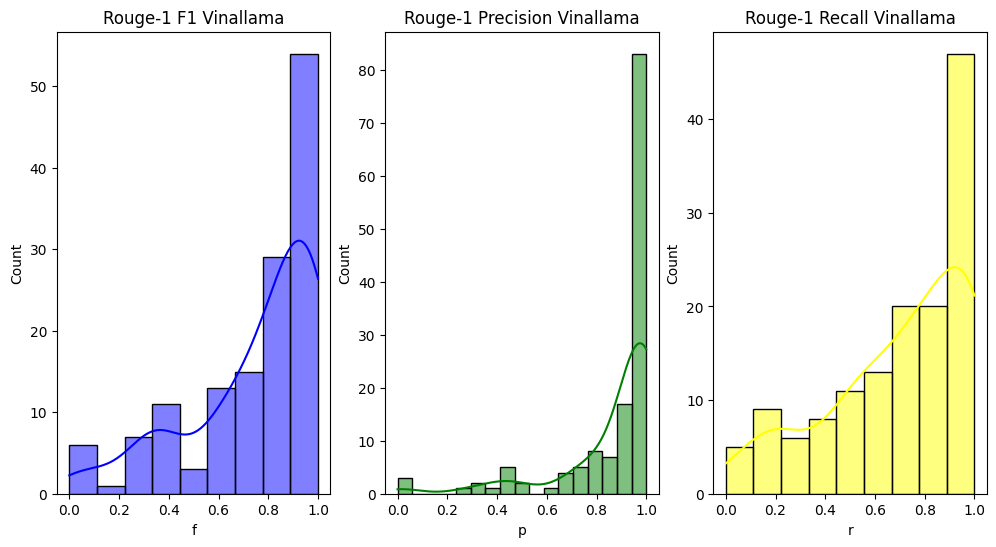

<Figure size 640x480 with 0 Axes>

In [23]:
fig, ax = plt.subplots(1,3, figsize=(12,6))
plt.figure()
sns.histplot(rouge_1_vina_df['f'], ax=ax[0], color="blue", kde=True)
sns.histplot(rouge_1_vina_df['p'], ax=ax[1], color="green", kde=True)
sns.histplot(rouge_1_vina_df['r'], ax=ax[2], color="yellow", kde=True)
ax[0].set_title("Rouge-1 F1 Vinallama")
ax[1].set_title("Rouge-1 Precision Vinallama")
ax[2].set_title("Rouge-1 Recall Vinallama")
fig.show()

C:\Users\xuanv\AppData\Local\Temp\ipykernel_13108\1908569939.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


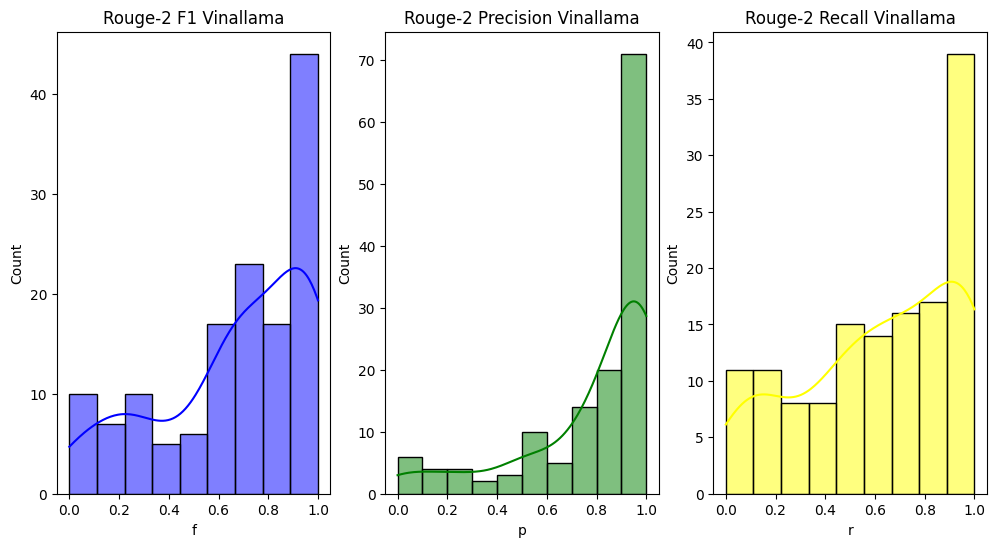

<Figure size 640x480 with 0 Axes>

In [24]:
fig, ax = plt.subplots(1,3, figsize=(12,6))
plt.figure()
sns.histplot(rouge_2_vina_df['f'], ax=ax[0], color="blue", kde=True)
sns.histplot(rouge_2_vina_df['p'], ax=ax[1], color="green", kde=True)
sns.histplot(rouge_2_vina_df['r'], ax=ax[2], color="yellow", kde=True)
ax[0].set_title("Rouge-2 F1 Vinallama")
ax[1].set_title("Rouge-2 Precision Vinallama")
ax[2].set_title("Rouge-2 Recall Vinallama")
fig.show()

C:\Users\xuanv\AppData\Local\Temp\ipykernel_13108\1809350918.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


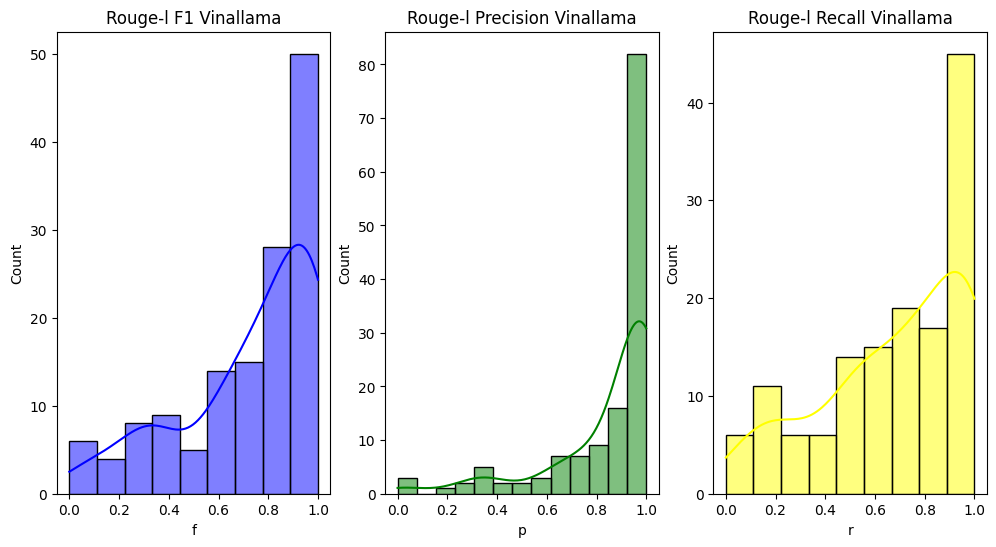

In [25]:
fig, ax = plt.subplots(1,3, figsize=(12,6))
sns.histplot(rouge_l_vina_df['f'], ax=ax[0], color="blue", kde=True)
sns.histplot(rouge_l_vina_df['p'], ax=ax[1], color="green", kde=True)
sns.histplot(rouge_l_vina_df['r'], ax=ax[2], color="yellow", kde=True)
ax[0].set_title("Rouge-l F1 Vinallama")
ax[1].set_title("Rouge-l Precision Vinallama")
ax[2].set_title("Rouge-l Recall Vinallama")
fig.show()